In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=df = pd.read_csv("data/filtered_customer_booking.csv")

In [3]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49978,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49979,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49980,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [4]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [5]:
from sklearn.preprocessing import OneHotEncoder


#create instance of one hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#one hot encode Sales Channel
encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})
df_final = df.join(encoder_df)

#one hot encode trip type
encoder_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTRip', 1:'OneWayTrip',2:'CircleTrip'})
df_final = df_final.join(encoder_df)

#### dropping any one of the one hot encoded column is necessary to avoid dummy trap situation which increases the model efficiency

In [6]:
#drop categorical columns now
df_final.drop(['sales_channel', 'trip_type','booking_origin', 'route','Internet','CircleTrip'], axis=1, inplace = True)

In [7]:
#store the label for supervised learning
label = df['booking_complete']

In [8]:
df_final = df_final.drop('booking_complete', axis=1)

In [9]:
df_final

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Mobile,RoundTRip,OneWayTrip
0,2,262,19,7,6,1,0,0,5.52,0.0,0.0,0.0
1,1,112,20,3,6,0,0,0,5.52,0.0,0.0,0.0
2,2,243,22,17,3,1,1,0,5.52,0.0,0.0,0.0
3,1,96,31,4,6,0,0,1,5.52,0.0,0.0,0.0
4,2,68,22,15,3,1,0,1,5.52,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,27,6,9,6,1,0,1,5.62,0.0,0.0,0.0
49978,1,111,6,4,7,0,0,0,5.62,0.0,0.0,0.0
49979,1,24,6,22,6,0,0,1,5.62,0.0,0.0,0.0
49980,1,15,6,11,1,1,0,1,5.62,0.0,0.0,0.0


### normalization

In [10]:
from sklearn.preprocessing import StandardScaler

#create a standard scaler object
scaler = StandardScaler()

#fit and transform the data
scaled_df = scaler.fit_transform(df_final)

In [11]:
#create a dataframe of scled data
scaled_df = pd.DataFrame(scaled_df, columns = df_final.columns)

In [12]:
# add the labels back to the dataframe
scaled_df['label']  = label

In [13]:
scaled_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Mobile,RoundTRip,OneWayTrip,label
0,0.400769,1.971093,-0.119401,-0.381588,1.096876,0.703587,-0.650054,-0.863557,-1.174049,-0.355786,-0.048231,-0.088336,0
1,-0.579424,0.302987,-0.089895,-1.120618,1.096876,-1.421288,-0.650054,-0.863557,-1.174049,-0.355786,-0.048231,-0.088336,0
2,0.400769,1.759799,-0.030885,1.465988,-0.408618,0.703587,1.538334,-0.863557,-1.174049,-0.355786,-0.048231,-0.088336,0
3,-0.579424,0.125056,0.234662,-0.935861,1.096876,-1.421288,-0.650054,1.158002,-1.174049,-0.355786,-0.048231,-0.088336,0
4,0.400769,-0.186323,-0.030885,1.096473,-0.408618,0.703587,-0.650054,1.158002,-1.174049,-0.355786,-0.048231,-0.088336,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,0.400769,-0.642272,-0.502969,-0.012073,1.096876,0.703587,-0.650054,1.158002,-1.107240,-0.355786,-0.048231,-0.088336,0
49978,-0.579424,0.291867,-0.502969,-0.935861,1.598707,-1.421288,-0.650054,-0.863557,-1.107240,-0.355786,-0.048231,-0.088336,0
49979,-0.579424,-0.675634,-0.502969,2.389776,1.096876,-1.421288,-0.650054,1.158002,-1.107240,-0.355786,-0.048231,-0.088336,0
49980,-0.579424,-0.775721,-0.502969,0.357443,-1.412280,0.703587,-0.650054,1.158002,-1.107240,-0.355786,-0.048231,-0.088336,0


### Correlation matrix

<AxesSubplot:>

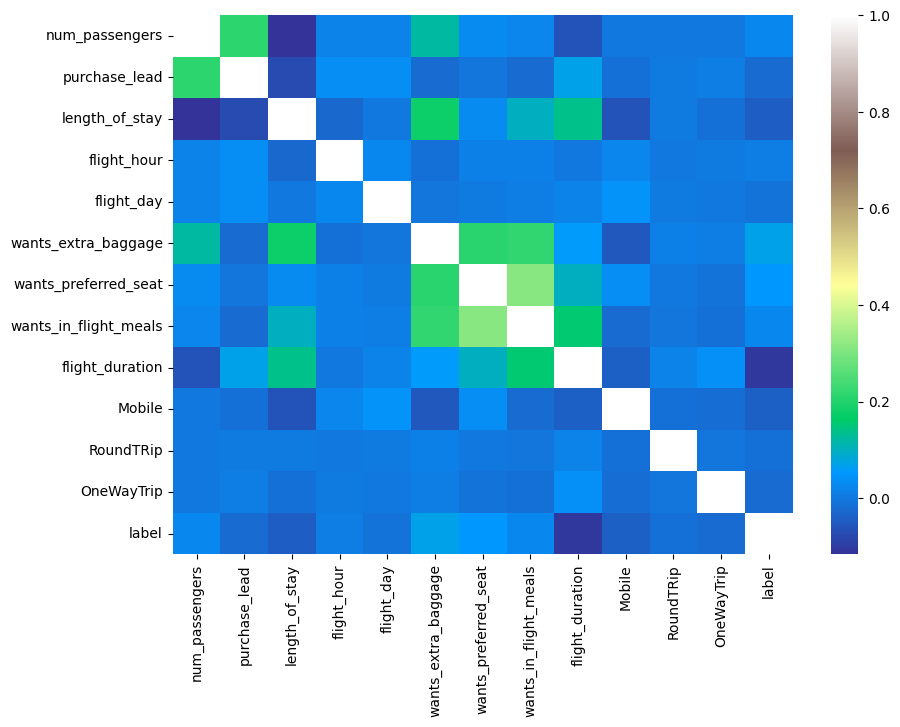

In [14]:
corr = scaled_df.corr()

plt.figure(figsize=(10,7))

#plot the heatmap
sns.heatmap(corr,cmap='terrain')

Now let's split the dataset into train and test sets.

In [15]:
scaled_df.label.value_counts()

0    42506
1     7476
Name: label, dtype: int64

In [33]:
#creating a balanced dataset to enhance model performance

In [17]:
new_df=pd.concat([scaled_df.query('label==1')[:7000],scaled_df.query('label==0')[:7000]],ignore_index=True)

In [18]:
new_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Mobile,RoundTRip,OneWayTrip,label
0,-0.579424,-0.775721,0.234662,1.465988,-1.412280,-1.421288,-0.650054,-0.863557,1.037314,-0.355786,-0.048231,-0.088336,1
1,-0.579424,0.792298,-0.119401,0.911715,-1.412280,0.703587,-0.650054,-0.863557,1.037314,-0.355786,-0.048231,-0.088336,1
2,-0.579424,1.070316,1.886956,-1.305376,-0.910449,0.703587,-0.650054,1.158002,1.037314,-0.355786,-0.048231,-0.088336,1
3,-0.579424,0.469798,-0.178411,1.281231,-0.910449,0.703587,-0.650054,1.158002,1.037314,2.810681,-0.048231,-0.088336,1
4,-0.579424,-0.475462,-0.178411,0.911715,-0.910449,-1.421288,-0.650054,-0.863557,1.037314,-0.355786,-0.048231,-0.088336,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,0.400769,-0.586669,0.411694,-0.196830,1.598707,0.703587,-0.650054,1.158002,0.870293,-0.355786,-0.048231,-0.088336,0
13996,-0.579424,0.225142,0.529715,-1.490134,0.093214,0.703587,-0.650054,1.158002,0.870293,-0.355786,-0.048231,-0.088336,0
13997,0.400769,-0.920290,2.713102,-0.012073,0.093214,0.703587,-0.650054,1.158002,0.870293,-0.355786,-0.048231,-0.088336,0
13998,-0.579424,-0.608910,0.116641,0.911715,-0.910449,0.703587,-0.650054,1.158002,0.870293,-0.355786,-0.048231,-0.088336,0


### splitting the data

In [19]:
from sklearn.model_selection import train_test_split

X = new_df.iloc[:,:-1]
y = new_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

### model building

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

In [35]:
class_names=[0,1]

In [21]:
rf_model=RandomForestClassifier(max_depth=50,min_samples_split=5,random_state=0)

In [22]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=50, min_samples_split=5, random_state=0)

In [23]:
y_pred=rf_model.predict(X_test)

### performance metrics

In [24]:
#f1 score for training data
f1 = f1_score(y_test, y_pred)
print(f1)

0.8080888183980969


In [38]:
cm=confusion_matrix(y_test, y_pred, labels=rf_model.classes_)

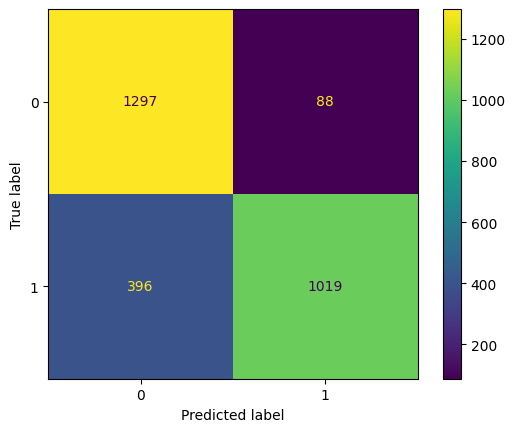

In [41]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)  
disp.plot()
plt.show()

In [27]:
accuracy_score(y_test, y_pred)

0.8271428571428572

In [28]:
precision_score(y_test, y_pred)

0.9205058717253839

In [29]:
recall_score(y_test, y_pred)

0.7201413427561838

In [30]:
sorted_idx = rf_model.feature_importances_.argsort()
sorted_idx

array([10, 11,  9,  5,  6,  7,  0,  4,  3,  1,  8,  2], dtype=int64)

### sorting top features in model performance

In [31]:
sorted_ = rf_model.feature_importances_
sorted_

array([0.02496472, 0.12754493, 0.50105345, 0.0837768 , 0.04893534,
       0.00991631, 0.01074337, 0.01231039, 0.16797582, 0.00795556,
       0.00058872, 0.0042346 ])

Text(0.5, 0, 'Random Forest Feature Importance')

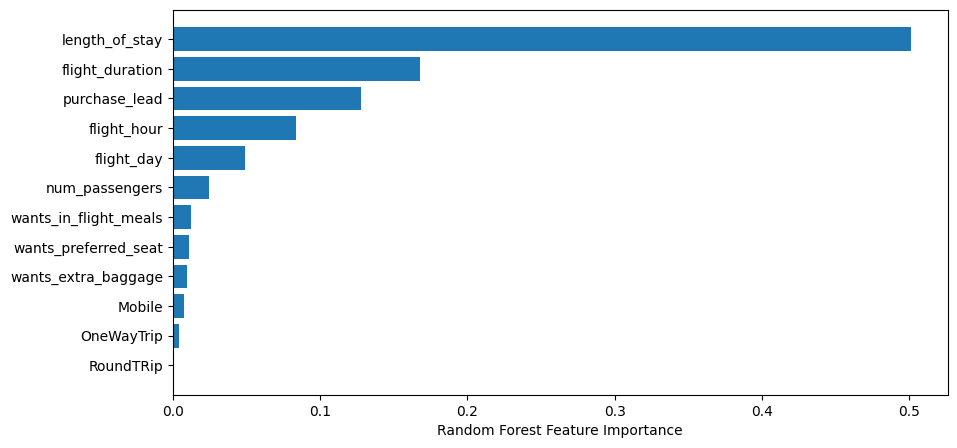

In [32]:
plt.figure(figsize=(10,5))
sorted_idx = rf_model.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], rf_model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")